# Import the Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.7.0'

# Image Preprocessing

## Preprocessing the training images

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_set = train_datagen.flow_from_directory(
        'C:/Mukund/Datasets/train_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2637 images belonging to 2 classes.


## Preprocessing the test images

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'C:/Mukund/Datasets/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 660 images belonging to 2 classes.


# Building the CNN

## Initializing the CNN 

In [5]:
cnn = tf.keras.models.Sequential()

## Adding a convolution layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

## Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

## Adding a second convolution layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

## Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

## Flatten

In [10]:
cnn.add(tf.keras.layers.Flatten())

## Full connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

## Adding the output layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Training the CNN

## Compiling CNN

In [13]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Training the CNN on the train set and evaluating it on the test set

In [14]:
model = cnn.fit(x=train_set,validation_data=test_set,epochs=19)

Epoch 1/19
83/83 [==============================] - 23s 266ms/step - loss: 0.6061 - accuracy: 0.6583 - val_loss: 0.5200 - val_accuracy: 0.7318
Epoch 2/19
83/83 [==============================] - 21s 255ms/step - loss: 0.5049 - accuracy: 0.7410 - val_loss: 0.4227 - val_accuracy: 0.7742
Epoch 3/19
83/83 [==============================] - 20s 242ms/step - loss: 0.4507 - accuracy: 0.7615 - val_loss: 0.4196 - val_accuracy: 0.7545
Epoch 4/19
83/83 [==============================] - 20s 241ms/step - loss: 0.4022 - accuracy: 0.7895 - val_loss: 0.4618 - val_accuracy: 0.7636
Epoch 5/19
83/83 [==============================] - 21s 252ms/step - loss: 0.4314 - accuracy: 0.7797 - val_loss: 0.3860 - val_accuracy: 0.8273
Epoch 6/19
83/83 [==============================] - 20s 246ms/step - loss: 0.3788 - accuracy: 0.8024 - val_loss: 0.3851 - val_accuracy: 0.8152
Epoch 7/19
83/83 [==============================] - 20s 242ms/step - loss: 0.3796 - accuracy: 0.8096 - val_loss: 0.3674 - val_accuracy: 0.8530

## Plotting accuracy and loss of train set and test set

In [15]:
import matplotlib.pyplot as plt

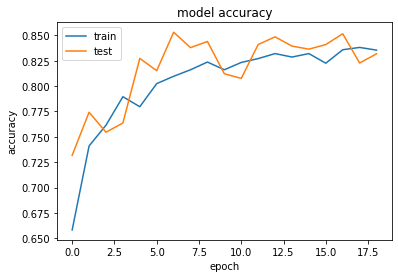

In [16]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

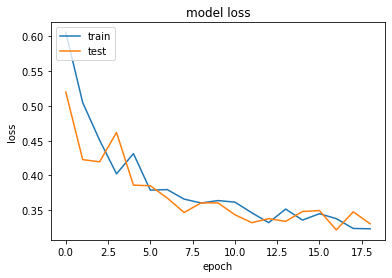

In [17]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()